Importing Required Dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

Loading the data

In [3]:
df = pd.read_csv('/content/Amazon123.csv')

Data Cleaning

In [10]:
df_cleaned = df.dropna().copy()

In [11]:
df.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219.0,M,23.0,306555.0,44.0
1,301220.0,F,26.0,306555.0,91.0
2,301221.0,F,24.0,326992.0,7.0
3,301222.0,M,28.0,326992.0,87.0
4,301223.0,F,38.0,347429.0,45.0


Encoding Gender

In [12]:
df_cleaned['Sex'] = df_cleaned['Sex'].map({'M': 1, 'F': 0})

In [13]:
df_cleaned.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219.0,1,23.0,306555.0,44.0
1,301220.0,0,26.0,306555.0,91.0
2,301221.0,0,24.0,326992.0,7.0
3,301222.0,1,28.0,326992.0,87.0
4,301223.0,0,38.0,347429.0,45.0


Feature engineering

In [14]:
df_cleaned['Income_per_Age'] = df_cleaned['Income'] / df_cleaned['Age']
df_cleaned['Behavior_Score'] = df_cleaned['Income'] * df_cleaned['Rating']

Selecting features

In [15]:
features = ['Age', 'Income', 'Rating', 'Income_per_Age', 'Behavior_Score']
X = df_cleaned[features]

In [16]:
print(X)

      Age     Income  Rating  Income_per_Age  Behavior_Score
0    23.0   306555.0    44.0    13328.478261      13488420.0
1    26.0   306555.0    91.0    11790.576923      27896505.0
2    24.0   326992.0     7.0    13624.666667       2288944.0
3    28.0   326992.0    87.0    11678.285714      28448304.0
4    38.0   347429.0    45.0     9142.868421      15634305.0
..    ...        ...     ...             ...             ...
195  42.0  2452440.0    89.0    58391.428571     218267160.0
196  54.0  2575062.0    32.0    47686.333333      82401984.0
197  39.0  2575062.0    83.0    66027.230769     213730146.0
198  39.0  2799869.0    21.0    71791.512821      58797249.0
199  36.0  2799869.0    93.0    77774.138889     260387817.0

[200 rows x 5 columns]


Scaling the features

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
print(X_scaled)

[[-1.43541772e+00 -1.73899919e+00 -4.40716194e-01 -1.01116385e+00
  -1.08455644e+00]
 [-1.25587829e+00 -1.73899919e+00  1.18963887e+00 -1.10708871e+00
  -8.09640156e-01]
 [-1.37557124e+00 -1.70082976e+00 -1.72418720e+00 -9.92689432e-01
  -1.29825023e+00]
 [-1.13618534e+00 -1.70082976e+00  1.05088525e+00 -1.11409275e+00
  -7.99111447e-01]
 [-5.37720583e-01 -1.66266033e+00 -4.06027788e-01 -1.27223655e+00
  -1.04361146e+00]
 [-1.19603181e+00 -1.66266033e+00  1.01619684e+00 -1.03990183e+00
  -7.71814795e-01]
 [-2.98334681e-01 -1.62449091e+00 -1.72418720e+00 -1.29619773e+00
  -1.29279090e+00]
 [-1.13618534e+00 -1.62449091e+00  1.70996496e+00 -1.02304026e+00
  -5.97896124e-01]
 [ 1.79629196e+00 -1.58632148e+00 -1.82825242e+00 -1.52796771e+00
  -1.31228851e+00]
 [-6.57413534e-01 -1.58632148e+00  8.42754815e-01 -1.16973594e+00
  -7.41788477e-01]
 [ 2.03567787e+00 -1.58632148e+00 -1.41199155e+00 -1.54350079e+00
  -1.22337941e+00]
 [-2.98334681e-01 -1.58632148e+00  1.88340698e+00 -1.26584690e+00

Elbow method to find the number of Clusters

wcss-within clusters sum of squares

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Plotting the elbow graph

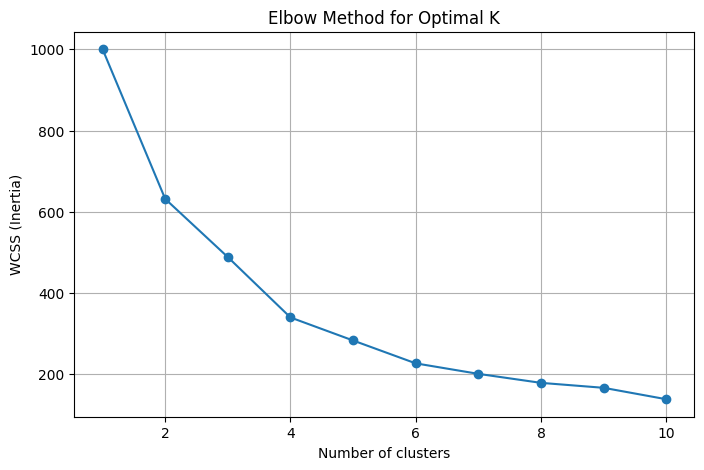

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

From the above gragh we can take number of clusters as 4

Applying K-Means Clustering

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)
df_cleaned['Cluster']

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
195,1
196,3
197,1
198,3


CLuster Labels

In [31]:
cluster_map = {
    0: "Young High Spenders",
    1: "Mid-Age Budget Seekers",
    2: "Valuable Loyalists",
    3: "Low-Value Users"
}
df_cleaned['Segment'] = df_cleaned['Cluster'].map(cluster_map)

In [32]:
print(df_cleaned.columns)

Index(['Cus_ID', 'Sex', 'Age', 'Income', 'Rating', 'Income_per_Age',
       'Behavior_Score', 'Cluster', 'PCA1', 'PCA2', 'Segment'],
      dtype='object')


Performing PCA for dimensionality Reduction (Principal Component Analysis)

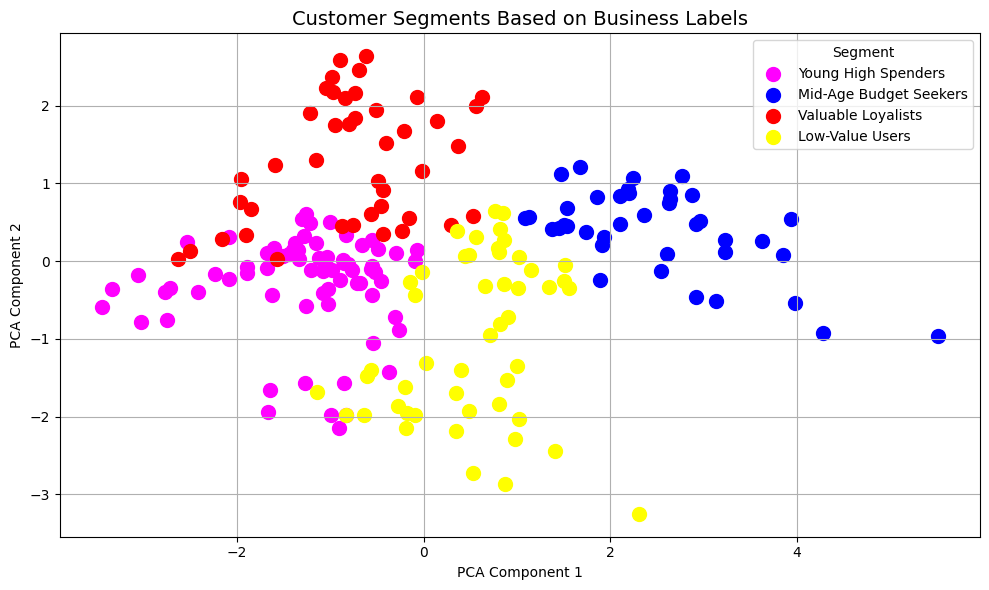

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]

# Unique segments and colors
segment_colors = {
    "Young High Spenders": "magenta",
    "Mid-Age Budget Seekers": "blue",
    "Valuable Loyalists": "red",
    "Low-Value Users": "yellow"
}

# Scatter plot using Segment labels
plt.figure(figsize=(10, 6))
for segment, color in segment_colors.items():
    subset = df_cleaned[df_cleaned['Segment'] == segment]
    plt.scatter(subset['PCA1'], subset['PCA2'], s=100, c=color, label=segment)

plt.title('Customer Segments Based on Business Labels', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
print(df_cleaned.columns)

Index(['Cus_ID', 'Sex', 'Age', 'Income', 'Rating', 'Income_per_Age',
       'Behavior_Score', 'Cluster', 'PCA1', 'PCA2', 'Segment'],
      dtype='object')


In [36]:
df_cleaned.rename(columns={"Behavior_Score": "Engagement_Score"}, inplace=True)

Summary Statistics

In [37]:
summary_stats = df_cleaned.groupby('Segment')[['Income', 'Rating', 'Engagement_Score']].mean().round(2)

In [38]:
print(summary_stats)

                            Income  Rating  Engagement_Score
Segment                                                     
Low-Value Users         1566141.53   36.94      5.265822e+07
Mid-Age Budget Seekers  1768586.54   92.41      1.632974e+08
Valuable Loyalists       612623.40   68.52      4.170656e+07
Young High Spenders     1086956.44   43.56      4.807512e+07


Plotting segments with their avg Income , Rating , Engagement_Score

<ipython-input-41-2831b19f8421>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_stats.index, y="Income", data=summary_stats.reset_index(), palette="viridis")


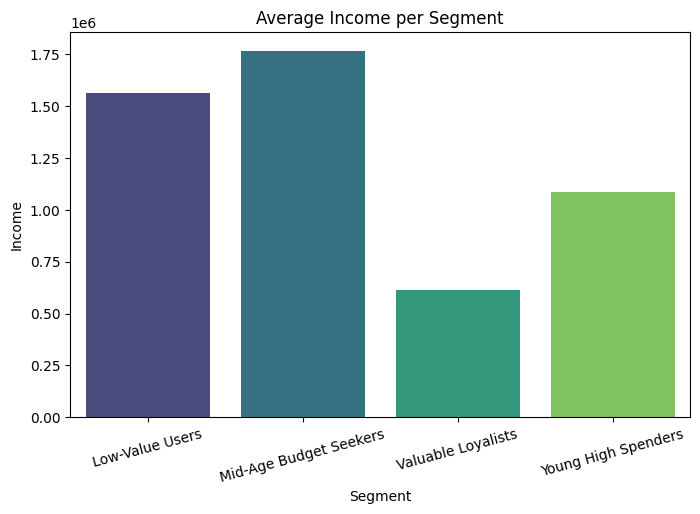

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x=summary_stats.index, y="Income", data=summary_stats.reset_index(), palette="viridis")
plt.title("Average Income per Segment")
plt.xticks(rotation=15)
plt.show()

<ipython-input-43-e89a678e55e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_stats.index, y="Rating", data=summary_stats.reset_index(), palette="viridis")


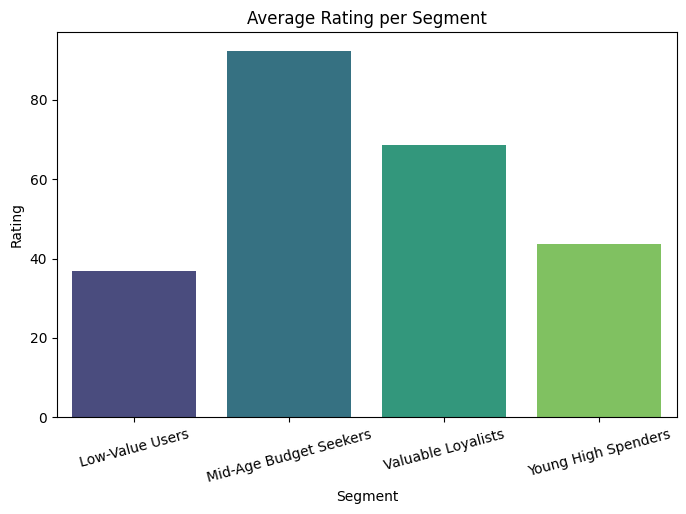

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x=summary_stats.index, y="Rating", data=summary_stats.reset_index(), palette="viridis")
plt.title("Average Rating per Segment")
plt.xticks(rotation=15)
plt.show()


<ipython-input-44-6b97e6f4d787>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_stats.index, y="Engagement_Score", data=summary_stats.reset_index(), palette="viridis")


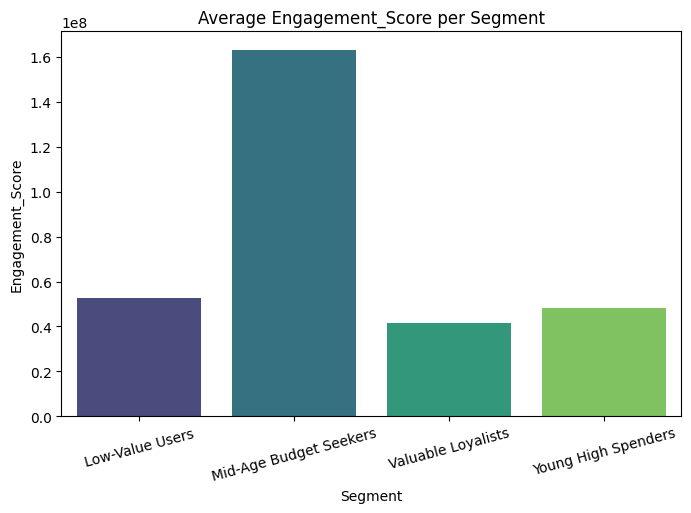

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x=summary_stats.index, y="Engagement_Score", data=summary_stats.reset_index(), palette="viridis")
plt.title("Average Engagement_Score per Segment")
plt.xticks(rotation=15)
plt.show()

In [45]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, df_cleaned['Cluster'])

RandomForestClassifier(random_state=42)

Sample prediction

In [51]:
customer_input = [23.0,306555.0,44.0,13328.478261,13488420.0]  # Example: Male, 23 years old, income 306555, rating 44
customer_input = np.array(customer_input).reshape(1, -1)
customer_input_scaled = scaler.transform(customer_input)
predicted_cluster = clf.predict(customer_input_scaled)[0]  # Extract scalar directly

predicted_segment = cluster_map[predicted_cluster]

print("Predicted Cluster:", predicted_cluster)
print("Predicted Segment:", predicted_segment)

Predicted Cluster: 2
Predicted Segment: Valuable Loyalists


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the classifier model and the Scalar File for using them in the Gradio User Interface

In [52]:
import pickle

# Save model
with open('cluster_classifier.sav', 'wb') as f:
    pickle.dump(clf, f)

# Save scaler
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)
